# Employee Satisfaction Survey Analysis


# Employee Satisfaction Survey Analysis

This notebook performs exploratory data analysis (EDA) on an employee satisfaction
survey dataset to identify key drivers of engagement, stress, and job satisfaction.
The goal is to provide actionable insights for HR decision-making.



In [ ]:
## Business Problem

A mid-sized IT company conducted an employee satisfaction survey to understand
factors influencing employee engagement, stress, and overall workplace happiness.

The HR team wants to:
- Identify key drivers of satisfaction and dissatisfaction
- Detect departments or factors with low morale
- Derive actionable recommendations to improve retention and culture


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Load Dataset

The dataset contains employee demographics, job-related factors, work environment
metrics, and self-reported job satisfaction scores.


In [2]:
# Update the path if required
df = pd.read_csv("employee_survey.csv")

df.head()


,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


## Initial Data Inspection

We begin by examining the dataset structure, size, and data types to understand
what kind of preprocessing is required.


In [3]:
df.shape


(3025, 23)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmpID                  3025 non-null   int64  
 1   Gender                 3025 non-null   object 
 2   Age                    3025 non-null   int64  
 3   MaritalStatus          3025 non-null   object 
 4   JobLevel               3025 non-null   object 
 5   Experience             3025 non-null   int64  
 6   Dept                   3025 non-null   object 
 7   EmpType                3025 non-null   object 
 8   WLB                    3025 non-null   int64  
 9   WorkEnv                3025 non-null   int64  
 10  PhysicalActivityHours  3025 non-null   float64
 11  Workload               3025 non-null   int64  
 12  Stress                 3025 non-null   int64  
 13  SleepHours             3025 non-null   float64
 14  CommuteMode            3025 non-null   object 
 15  Comm

## Variable Classification

Before analysis, it is important to identify variable types to avoid incorrect
EDA techniques.

- Categorical: Gender, Dept, EmpType, CommuteMode
- Ordinal: JobLevel, WorkEnv, Workload, Stress, JobSatisfaction
- Continuous: Age, Experience, SleepHours, CommuteDistance, TrainingHoursPerYear
- Identifier: EmpID (will be removed)


In [5]:
df = df.drop(columns=["EmpID"])


## Missing Value Treatment

- Numerical features: median imputation
- Categorical features: mode imputation


In [7]:
# Numerical columns
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())

# Categorical columns
for col in df.select_dtypes(include="object"):
    df[col] = df[col].fillna(df[col].mode()[0])


## Descriptive Statistics

We analyze summary statistics for continuous variables to understand typical
employee profiles and detect anomalies.


In [8]:
df[['Age','Experience','SleepHours','CommuteDistance','TrainingHoursPerYear']].describe()


,Age,Experience,SleepHours,CommuteDistance,TrainingHoursPerYear
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,35.741818,9.082645,7.005983,13.473719,37.301653
std,10.191833,7.073344,1.002652,8.395249,13.569772
min,22.000000,0.000000,4.000000,1.000000,10.000000
25%,27.000000,3.000000,6.300000,6.000000,23.500000
50%,34.000000,8.000000,7.000000,13.000000,40.000000
75%,43.000000,14.000000,7.700000,21.000000,46.500000
max,60.000000,29.000000,10.000000,29.000000,64.500000


## Job Satisfaction Distribution

Job satisfaction is the target variable and represents employee sentiment on a
scale of 1 (low) to 5 (high).


In [9]:
df['JobSatisfaction'].value_counts().sort_index()


JobSatisfaction
1     417
2     277
3     566
4    1249
5     516
Name: count, dtype: int64

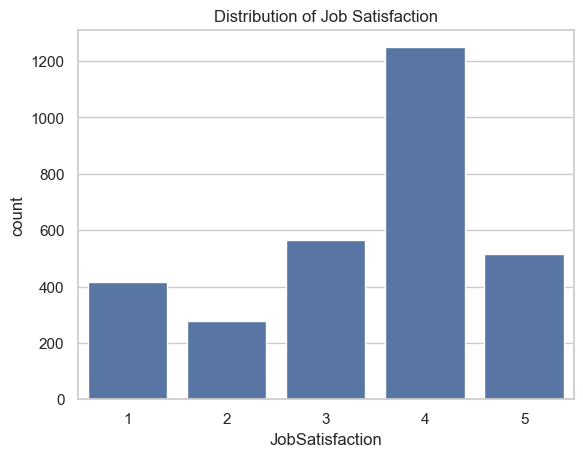

In [10]:
sns.countplot(x='JobSatisfaction', data=df)
plt.title("Distribution of Job Satisfaction")
plt.show()


## Relationship Between Work Factors and Job Satisfaction

We analyze how stress, workload, and work environment relate to job satisfaction.


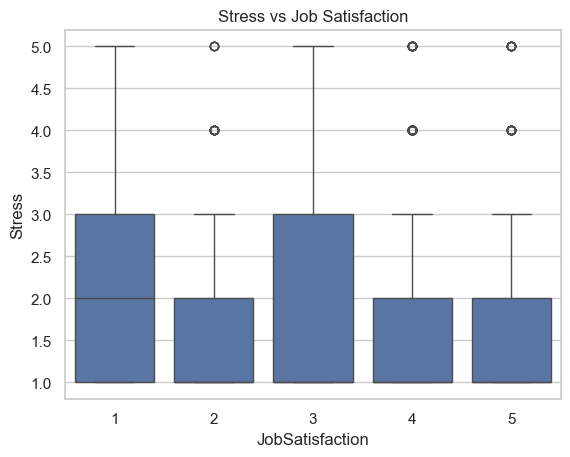

In [11]:
sns.boxplot(x='JobSatisfaction', y='Stress', data=df)
plt.title("Stress vs Job Satisfaction")
plt.show()


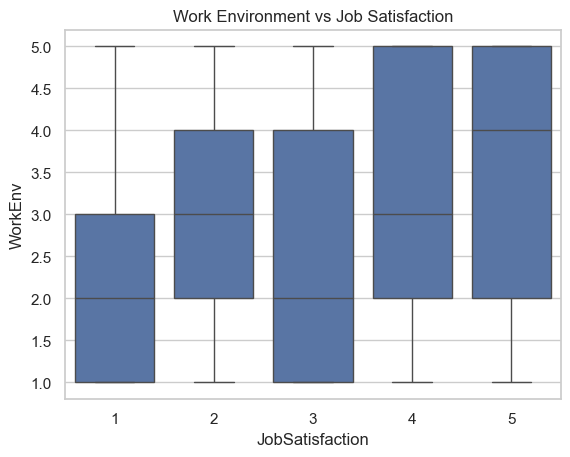

In [12]:
sns.boxplot(x='JobSatisfaction', y='WorkEnv', data=df)
plt.title("Work Environment vs Job Satisfaction")
plt.show()


## Department-wise Job Satisfaction

Identifying departments with consistently lower satisfaction helps HR target
interventions effectively.


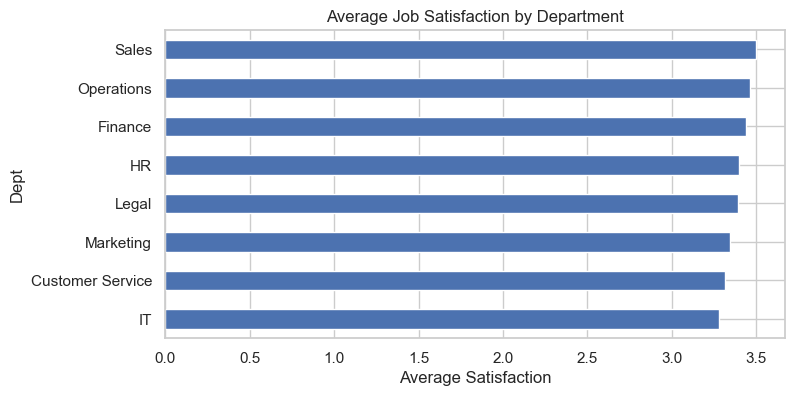

In [13]:
dept_sat = df.groupby('Dept')['JobSatisfaction'].mean().sort_values()

dept_sat.plot(kind='barh', figsize=(8,4))
plt.title("Average Job Satisfaction by Department")
plt.xlabel("Average Satisfaction")
plt.show()


## Correlation Analysis

Correlation helps identify numerical factors most strongly associated with
job satisfaction.


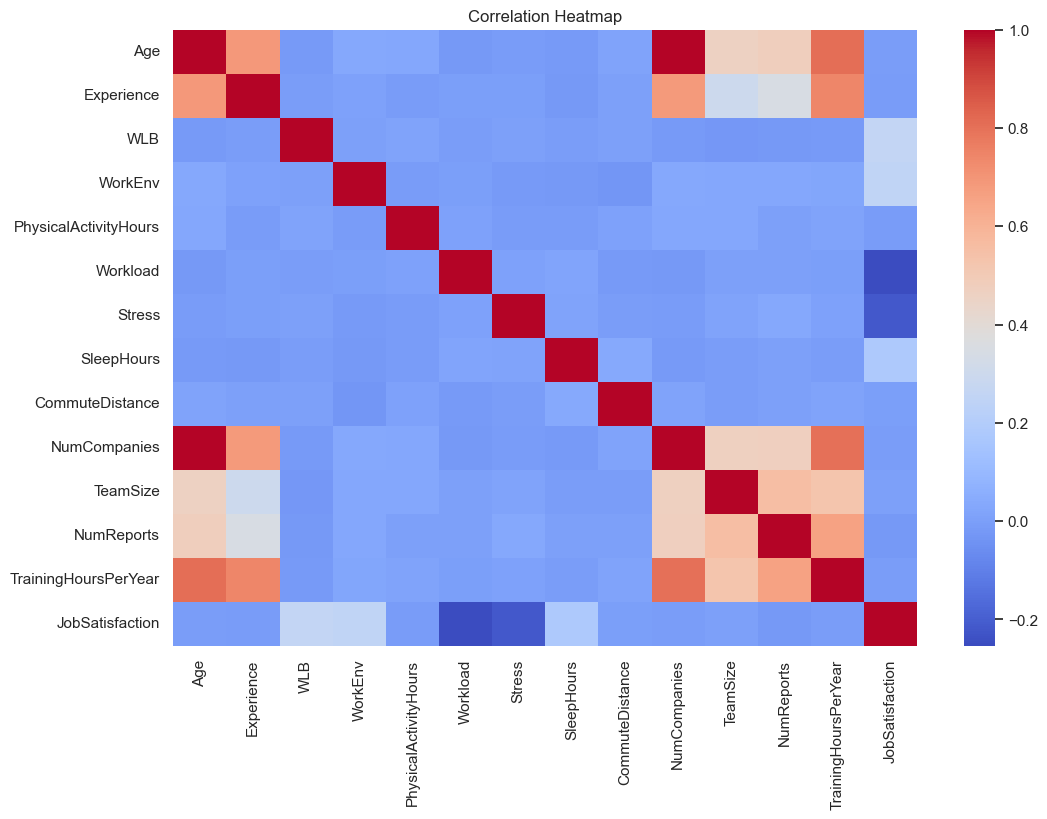

In [14]:
corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


## Key Insights

- High stress and workload strongly correlate with low job satisfaction
- Better work environment leads to higher satisfaction
- Certain departments show consistently lower morale
- Long commute distance and reduced sleep negatively affect satisfaction
- Training hours show a mild positive impact on satisfaction


## HR Recommendations

- Implement stress and workload management programs
- Improve workplace environment and flexibility
- Focus on low-satisfaction departments with leadership interventions
- Promote remote or hybrid work to reduce commute stress
- Invest in employee training and development initiatives


## Conclusion

This analysis highlights the key drivers of employee satisfaction and identifies
areas where HR interventions can significantly improve morale and retention.
Future work may include predictive modeling and explainable AI techniques.
